# Prep

In [1]:
import tensorflow as tf
import os
import random
# import cv2
import numpy as np

# Important!
include_other_class = True
grayscale = True

if grayscale is True:
  channels = 1
else:
  channels = 3

if include_other_class:
  num_classes = 6
else:
  num_classes = 5

# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
print(gpu_devices)
for device in gpu_devices:
  tf.config.experimental.set_memory_growth(device, True)

tf.keras.mixed_precision.set_global_policy('mixed_float16')

batch_size = 8
dataset_percent = 0.5
image_dimensions = (512, 512)

training_presets_subfolder_name = f'6_class/{str(image_dimensions[0])}_{str(int(dataset_percent*100))}_6_class'

if include_other_class is True:
  encoder_filepath = f"./datasets/{training_presets_subfolder_name}/encoder.pkl"
  model_filepath = f'./models/6_class/fastener_net_6_{str(image_dimensions[0])}_{str(int(dataset_percent*100))}.keras'
else:
  encoder_filepath = f"./datasets/{training_presets_subfolder_name}/encoder_NO_OTHER.pkl"
  model_filepath = f'./models/6_class/fastener_net_6_{str(image_dimensions[0])}_{str(int(dataset_percent*100))}_NO_OTHER.keras'

if grayscale is True:
  model_filepath = f'./models/6_class/fastener_net_6_{str(image_dimensions[0])}_{str(int(dataset_percent*100))}_grayscale.keras'

model_results_filepath = f'./model_results/{str(image_dimensions[0])}_{str(int(dataset_percent*100))}_6_class'

print(f'Training presets folder: {training_presets_subfolder_name}')
print(f'Encoder filepath: {encoder_filepath}')
print(f'Model filepath: {model_filepath}')
print(f'Model results filepath: {model_results_filepath}')
print(f'Include misc: {include_other_class}')

2024-06-13 16:11:11.688256: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Training presets folder: 6_class/512_50_6_class
Encoder filepath: ./datasets/6_class/512_50_6_class/encoder.pkl
Model filepath: ./models/6_class/fastener_net_6_512_50_grayscale.keras
Model results filepath: ./model_results/512_50_6_class
Include misc: True


2024-06-13 16:11:13.755854: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-13 16:11:13.773220: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-13 16:11:13.781067: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [2]:
%reset -f

# Prepare Data

### Load

In [2]:
import pickle

if include_other_class is False:
  training_set_file_path = f"./datasets/{training_presets_subfolder_name}/training_set_NO_OTHER.pkl"
  validation_set_file_path = f"./datasets/{training_presets_subfolder_name}/validation_set_NO_OTHER.pkl"
  test_set_file_path = f"./datasets/{training_presets_subfolder_name}/test_set_NO_OTHER.pkl"
else:
  training_set_file_path = f"./datasets/{training_presets_subfolder_name}/training_set.pkl"
  validation_set_file_path = f"./datasets/{training_presets_subfolder_name}/validation_set.pkl"
  test_set_file_path = f"./datasets/{training_presets_subfolder_name}/test_set.pkl"

if grayscale is True:
  training_set_file_path = f"./datasets/{training_presets_subfolder_name}/training_set_grayscale.pkl"
  validation_set_file_path = f"./datasets/{training_presets_subfolder_name}/validation_set_grayscale.pkl"
  test_set_file_path = f"./datasets/{training_presets_subfolder_name}/test_set_grayscale.pkl"

with open(training_set_file_path, "rb") as file:
  print('Loading training set...')
  train_set = pickle.load(file)
  print('Done!')
  
with open(validation_set_file_path, "rb") as file:
  print('Loading validation set...')
  validation_set = pickle.load(file)
  print('Done!')
  
with open(test_set_file_path, "rb") as file:
  print('Loading test set...')
  test_set = pickle.load(file)
  print('Done!')

print(set([t[1] for t in train_set]))

Loading training set...
Done!
Loading validation set...
Done!
Loading test set...
Done!
{0, 1, 2, 3, 4, 5}


### Format

In [3]:
(train_images, train_labels) = zip(*train_set)
(validation_images, validation_labels) = zip(*validation_set)
(test_images, test_labels) = zip(*test_set)

train_set_len = len(train_images)
validation_set_len = len(validation_images)
del train_set, validation_set, test_set

train_images = np.array(train_images)
train_labels = np.array([int(label) for label in train_labels])
validation_images = np.array(validation_images)
validation_labels = np.array([int(label) for label in validation_labels])
test_images = np.array(test_images)
test_labels = np.array([int(label) for label in test_labels])

### Optional: View

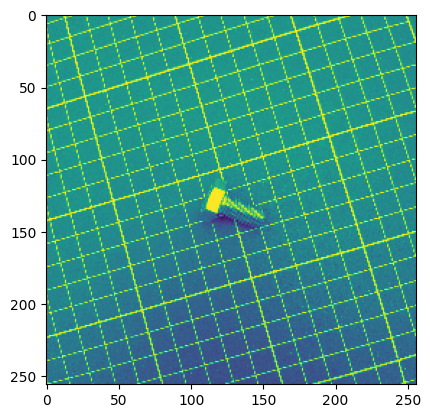

1


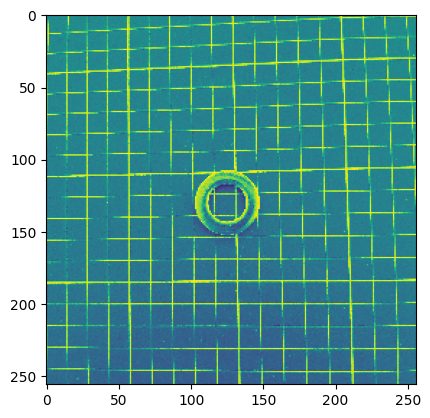

4


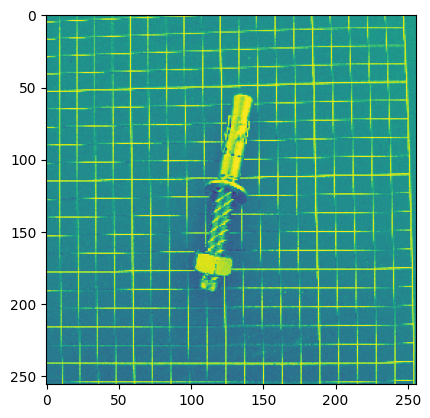

0


In [6]:
import matplotlib.pyplot as plt

i = random.randint(0, len(train_images))
train_l = train_labels[i]
train_im = train_images[i].astype(np.short)

i = random.randint(0, len(validation_images))
validation_l = validation_labels[i]
validation_im = validation_images[i].astype(np.short)

i = random.randint(0, len(test_images))
test_l = test_labels[i]
test_im = test_images[i].astype(np.short)

plt.imshow(train_im); plt.show()
print(train_l)
plt.imshow(validation_im); plt.show()
print(validation_l)
plt.imshow(test_im); plt.show()
print(test_l)

### Create Dataset

In [4]:
# test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)
del test_images, test_labels

def data_generator(X, y, batch_size):
    num_samples = X.shape[0]
    while True:
        for i in range(0, num_samples, batch_size):
            yield X[i:i+batch_size], y[i:i+batch_size]

train_generator = data_generator(train_images, train_labels, batch_size)
# train_dataset = tf.data.Dataset.from_generator(
#     lambda: train_generator,
#     output_signature=(
#         tf.TensorSpec(shape=(None, image_dimensions[0], image_dimensions[0], 3), dtype=tf.float32),
#         tf.TensorSpec(shape=(None, ), dtype=tf.float32)
#     )
# ).repeat()
del train_images, train_labels

validation_generator = data_generator(validation_images, validation_labels, batch_size)
# validation_dataset = tf.data.Dataset.from_generator(
#     lambda: validation_generator,
#     output_signature=(
#         tf.TensorSpec(shape=(None, image_dimensions[0], image_dimensions[0], 3), dtype=tf.float32),
#         tf.TensorSpec(shape=(None, ), dtype=tf.float32)
#     )
# ).repeat()
del validation_images, validation_labels

# train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
# del train_images, train_labels

# validation_dataset = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
# del validation_images, validation_labels

# Model Definition

### Simpler

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
import gc

gc.collect() 
keras.backend.clear_session()

In [7]:
inputs = keras.Input(shape=(image_dimensions[0], image_dimensions[1], channels))
x = layers.Rescaling(1./255)(inputs)

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomFlip("vertical"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
    ]
)

x = data_augmentation(x)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)  
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=1024, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  

outputs = layers.Dense(num_classes, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

2024-06-13 14:20:22.375839: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-13 14:20:22.384372: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-13 14:20:22.392252: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 512, 512, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 512, 512, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 512, 512, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 510, 510, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 510, 510, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 255, 255, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 253, 253, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 253, 253, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 124, 124, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 60, 60, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 1024)   │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 1024)   │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 6,301,830 (24.04 MB)

 Trainable params: 6,297,798 (24.02 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
            optimizer=keras.optimizers.Adam(),
            metrics=["accuracy"])

### Complex

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
import gc

gc.collect() 
keras.backend.clear_session()

In [10]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
        layers.RandomBrightness(0.05),
        layers.RandomContrast(0.05),
        layers.RandomTranslation(0.05, 0.05),
    ]
)

inputs = keras.Input(shape=(image_dimensions[0], image_dimensions[1], 3))
x = data_augmentation(inputs)

x = layers.Rescaling(1./255)(x)

# First regular convolution layer
x = layers.Conv2D(filters=32, kernel_size=3, use_bias=False)(x)

for size in [32, 64, 128, 256, 512, 1024, 2048]:
    residual = x
    
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)
    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)
    
    residual = layers.Conv2D(size, 1, strides=2, padding="same", use_bias=False)(residual)
    x = layers.add([x, residual])

x = layers.GlobalAveragePooling2D()(x)

x = layers.Dropout(0.5)(x)  

x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(num_classes, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 128, 128,  │          0 │ input_layer_2[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 128, 128,  │          0 │ sequential_1[0][… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 126, 126,  │        864 │ rescaling_1[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 126, 126,  │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_14       │ (None, 126, 126,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_14 │ (None, 126, 126,  │      1,312 │ activation_14[0]… │
│ (SeparableConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 126, 126,  │        128 │ separable_conv2d… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_15       │ (None, 126, 126,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_15 │ (None, 126, 126,  │      1,312 │ activation_15[0]… │
│ (SeparableConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 63, 63,    │          0 │ separable_conv2d… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 63, 63,    │      1,024 │ conv2d_1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 63, 63,    │          0 │ max_pooling2d_7[… │
│                     │ 32)               │            │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 63, 63,    │        128 │ add[0][0]         │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_16       │ (None, 63, 63,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_16 │ (None, 63, 63,    │      2,336 │ activation_16[0]… │
│ (SeparableConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 63, 63,    │        256 │ separable_conv2d

 Total params: 11,791,301 (44.98 MB)

 Trainable params: 11,779,077 (44.93 MB)

 Non-trainable params: 12,224 (47.75 KB)

In [11]:
optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-5)
model.compile(loss="sparse_categorical_crossentropy",
            optimizer=optimizer,
            metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Training

### Training

In [9]:
import math

print(model_filepath)
epochs = input('Number of epochs: ')

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=model_filepath,
        save_best_only=True,
        monitor='val_loss')
]

history = model.fit(train_generator,
                    steps_per_epoch=math.ceil(train_set_len / batch_size),
                    epochs=int(epochs),
                    validation_data=validation_generator,
                    validation_steps=math.ceil(validation_set_len / batch_size),
                    callbacks=callbacks)

./models/6_class/fastener_net_6_512_50_grayscale.keras
Epoch 1/25


2024-06-13 14:20:37.118401: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


774/774 ━━━━━━━━━━━━━━━━━━━━ 140s 172ms/step - accuracy: 0.2424 - loss: 2.0720 - val_accuracy: 0.2258 - val_loss: 2.9431
Epoch 2/25
774/774 ━━━━━━━━━━━━━━━━━━━━ 134s 173ms/step - accuracy: 0.3103 - loss: 1.7551 - val_accuracy: 0.1621 - val_loss: 39.1465
Epoch 3/25
774/774 ━━━━━━━━━━━━━━━━━━━━ 133s 172ms/step - accuracy: 0.4392 - loss: 1.4744 - val_accuracy: 0.2061 - val_loss: 8.9851
Epoch 4/25
774/774 ━━━━━━━━━━━━━━━━━━━━ 129s 166ms/step - accuracy: 0.4964 - loss: 1.3410 - val_accuracy: 0.1894 - val_loss: 8.3954
Epoch 5/25
774/774 ━━━━━━━━━━━━━━━━━━━━ 129s 166ms/step - accuracy: 0.5415 - loss: 1.2470 - val_accuracy: 0.2833 - val_loss: 10.3950
Epoch 6/25
774/774 ━━━━━━━━━━━━━━━━━━━━ 129s 167ms/step - accuracy: 0.5878 - loss: 1.1093 - val_accuracy: 0.2015 - val_loss: 16.6372
Epoch 7/25
774/774 ━━━━━━━━━━━━━━━━━━━━ 129s 166ms/step - accuracy: 0.6256 - loss: 0.9942 - val_accuracy: 0.3333 - val_loss: 8.7451
Epoch 8/25
774/774 ━━━━━━━━━━━━━━━━━━━━ 128s 165ms/step - accuracy: 0.6957 - loss: 0

### In Case of Crash

In [6]:
import math

load_filepath = f'./models/6_class/fastener_net_6_{str(image_dimensions[0])}_{str(int(dataset_percent*100))}_grayscale.keras'
test_model = keras.models.load_model(load_filepath)
save_filepath = f'./models/6_class/fastener_net_6_{str(image_dimensions[0])}_{str(int(dataset_percent*100))}_grayscale_new.keras'
print(test_model)
epochs = input('Number of epochs: ')

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=save_filepath,
        save_best_only=True,
        monitor='val_loss')
]

history = test_model.fit(train_generator,
                    steps_per_epoch=math.ceil(train_set_len / batch_size),
                    epochs=int(epochs),
                    validation_data=validation_generator,
                    validation_steps=math.ceil(validation_set_len / batch_size),
                    callbacks=callbacks)

2024-06-13 16:11:27.315531: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-13 16:11:27.320435: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-13 16:11:27.330194: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

<Functional name=functional_2, built=True>
Epoch 1/20


2024-06-13 16:11:36.777215: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
2024-06-13 16:11:38.661140: E external/local_xla/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:308] gpu_async_0 cuMemAllocAsync failed to allocate 2351955968 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 1102249984/3892510720
2024-06-13 16:11:38.661201: E external/local_xla/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:313] Stats: Limit:                      2283601920
InUse:                      1260015904
MaxInUse:                   2513064224
NumAllocs:                         654
MaxAllocSize:               1262490112
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2024-06-13 16:11:38.661238: E external/local_xla/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:62] Histogram of current allocation: (allocation_s

387/387 ━━━━━━━━━━━━━━━━━━━━ 133s 324ms/step - accuracy: 0.8269 - loss: 0.4726 - val_accuracy: 0.7379 - val_loss: 1.3158
Epoch 2/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 122s 314ms/step - accuracy: 0.8293 - loss: 0.4329 - val_accuracy: 0.4152 - val_loss: 7.6030
Epoch 3/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 119s 308ms/step - accuracy: 0.8453 - loss: 0.4129 - val_accuracy: 0.6727 - val_loss: 1.6618
Epoch 4/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 124s 322ms/step - accuracy: 0.8574 - loss: 0.3942 - val_accuracy: 0.3379 - val_loss: 12.0239
Epoch 5/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 120s 310ms/step - accuracy: 0.8680 - loss: 0.3556 - val_accuracy: 0.5212 - val_loss: 4.4350
Epoch 6/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 120s 310ms/step - accuracy: 0.8577 - loss: 0.3806 - val_accuracy: 0.7152 - val_loss: 1.7503
Epoch 7/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 121s 314ms/step - accuracy: 0.8659 - loss: 0.3677 - val_accuracy: 0.3076 - val_loss: 19.1170
Epoch 8/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 124s 322ms/step - accuracy: 0.8664 - loss: 0.

### Results

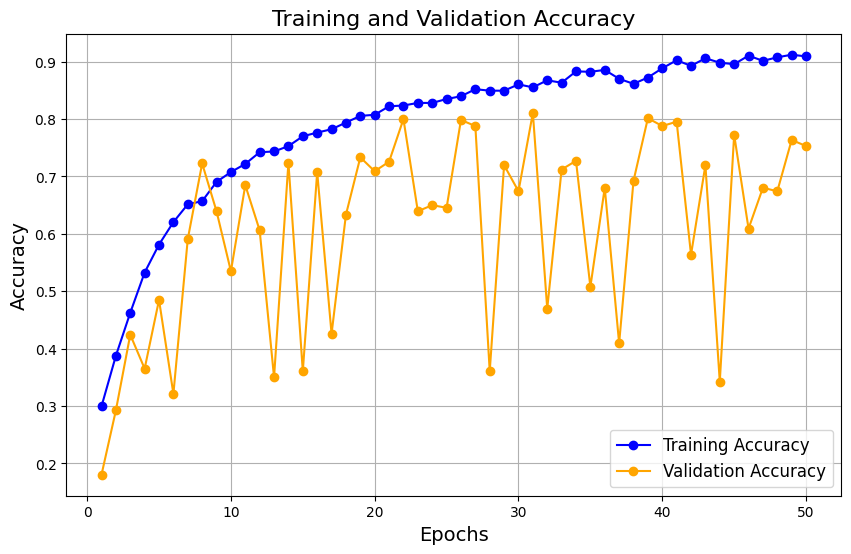

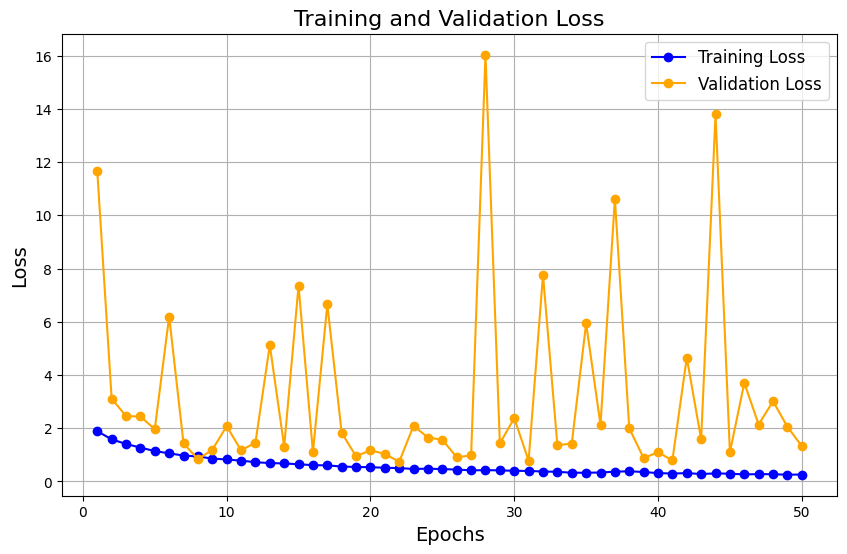

In [20]:
import matplotlib.pyplot as plt

# Extracting the history values
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

# Setting a style for the plots
# plt.style.use('seaborn-darkgrid')

# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, "o-", label="Training Accuracy", color='blue')
plt.plot(epochs, val_accuracy, "o-", label="Validation Accuracy", color='orange')
plt.title("Training and Validation Accuracy", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.savefig(f'{model_results_filepath}/accuracy_history.png', bbox_inches='tight')

# Plotting Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, "o-", label="Training Loss", color='blue')
plt.plot(epochs, val_loss, "o-", label="Validation Loss", color='orange')
plt.title("Training and Validation Loss", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.grid(True)
plt.savefig(f'{model_results_filepath}/loss_history.png', bbox_inches='tight')

# Display the plots
plt.show()